In [1]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

from collections import defaultdict

In [56]:
def read_files():
    d = defaultdict(list)

    parent_dir = '../Data Sets/'

    path_dic = {'B': 'business_s.csv', 'C':'checkin.csv', 'R':'review_s.csv'\
               , 'T':'tip.csv', 'U':'user.csv'}

    for key in path_dic:
        d[key] = pd.read_csv(parent_dir + path_dic[key]).drop('Unnamed: 0', 1)
    return d
def show():
    sns.despine()
    plt.show()

In [3]:
d = read_files()

# Look at review data 

## Perform a random sample

In [12]:
d['R'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4737 entries, 0 to 4736
Data columns (total 9 columns):
business_id    4737 non-null object
cool           4737 non-null int64
date           4737 non-null object
funny          4737 non-null float64
review_id      4737 non-null object
stars          4737 non-null float64
text           4737 non-null object
useful         4737 non-null float64
user_id        4737 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 333.1+ KB


In [13]:
np.random.seed(47)
# d['R'] = d['R'].sample(frac = .001, replace = False)
# d['R'].to_csv('../Data Sets/review_s.csv')

In [14]:
d['RB'] = d['R'].merge(d['B'], on = 'business_id', how = 'inner')

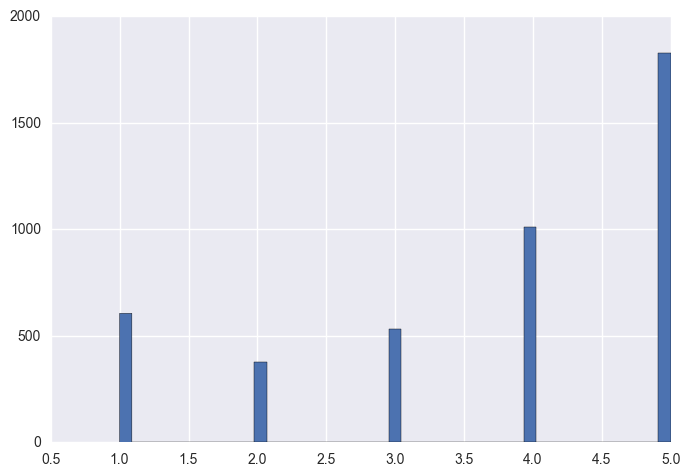

In [15]:
d['RB']['stars_x'].hist(bins = 45)
plt.show()

In [16]:
pd.set_option('display.max_columns', 500)
d['RB'].head()

,business_id,cool,date,funny,review_id,stars_x,text,useful,user_id,address,attributes,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars_y,state,price,credit_card
0,fjMXGgOr3aCxnN48kovZ_Q,0,2015-03-09,0.0,3BBCHVND9tDPNliTFoLCHA,5.0,We recently decided to give this place another...,0.0,bCrpStRCku_gEX3Iwuv94A,5051 W Craig Rd,{},"['Pets', 'Veterinarians']",Las Vegas,"{'Sunday': '6:00-22:00', 'Wednesday': '6:00-22...",1,36.238959,-115.211568,Craig Road Animal Hospital,Northwest,89130,192,4.0,NV,NaN,NaN
1,4dG1QdAF9sE7c00Q-VVkMg,0,2017-03-05,0.0,9rGfGE9qh3imgo9loAR4jQ,1.0,"Honestly, very rarely do I leave a negative fe...",1.0,nEhDik3rrQFZO4kRC_3aJw,"1940 W Indian School Rd, Ste 10","{'WheelchairAccessible': True, 'RestaurantsPri...","['Home & Garden', 'Lighting Fixtures & Equipme...",Phoenix,"{'Sunday': '8:00-18:00', 'Wednesday': '7:00-20...",1,33.497043,-112.101171,Walt's Ace Hardware & Plumbing Supply,NaN,85015,35,3.5,AZ,2.0,True
2,JCZEK7wiazoM6xiq8YeZyw,0,2010-03-04,0.0,S7LP0sBrA36wDICecodzlQ,4.0,"Good food. Place seems a little hidden, but I ...",1.0,g_GhhHtMofLnlokoScupBQ,3937 E Anne St,"{'OutdoorSeating': True, 'WiFi': 'no', 'Restau...","['Breakfast & Brunch', 'Restaurants', 'America...",Phoenix,"{'Monday': '6:00-14:00', 'Tuesday': '6:00-14:0...",1,33.412592,-111.996111,The Peppersauce Cafe,NaN,85040,91,4.0,AZ,1.0,True
3,G1wpQtbw-JeSv_3oGW4G3A,0,2015-04-09,0.0,rKdYDs9tKoiBKuZu43BRkw,5.0,Great wine and beer selections along with grea...,0.0,DrRR-eF7qAS-iunG86b4Xg,18300 Royalton Rd,"{'BusinessAcceptsCreditCards': True, 'BikePark...","['Grocery', 'Food']",Strongsville,"{'Sunday': '8:00-18:00', 'Wednesday': '8:00-20...",1,41.316065,-81.828930,Heinen's Grocery Store,NaN,44136,19,4.5,OH,2.0,True
4,nqTvE7ivdU23oUWdI01tOA,0,2015-01-22,0.0,jRGRP4U-V82Ty6vy_ydLeA,4.0,Went there with my family for a casual quick d...,0.0,-7jOvj4-RK_RCiAjLei1bA,568 Parliament Street,"{'OutdoorSeating': False, 'WiFi': 'free', 'Res...","['Caribbean', 'Restaurants', 'Food', 'Breakfas...",Toronto,"{'Saturday': '9:00-22:00', 'Sunday': '9:00-21:...",1,43.667423,-79.369456,Under The Table Restaurant,Cabbagetown,M4X 1P8,337,4.5,ON,2.0,True


In [17]:
d['RB'] = d['RB'].dropna(subset = ['is_open'])

In [18]:
d['RB'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 0 to 4348
Data columns (total 25 columns):
business_id     4349 non-null object
cool            4349 non-null int64
date            4349 non-null object
funny           4349 non-null float64
review_id       4349 non-null object
stars_x         4349 non-null float64
text            4349 non-null object
useful          4349 non-null float64
user_id         4349 non-null object
address         4277 non-null object
attributes      4349 non-null object
categories      4349 non-null object
city            4349 non-null object
hours           4349 non-null object
is_open         4349 non-null int64
latitude        4349 non-null float64
longitude       4349 non-null float64
name            4349 non-null object
neighborhood    2138 non-null object
postal_code     4335 non-null object
review_count    4349 non-null int64
stars_y         4349 non-null float64
state           4349 non-null object
price           3581 non-null float64
c

In [19]:
print(list(d['RB']))

['business_id', 'cool', 'date', 'funny', 'review_id', 'stars_x', 'text', 'useful', 'user_id', 'address', 'attributes', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'review_count', 'stars_y', 'state', 'price', 'credit_card']


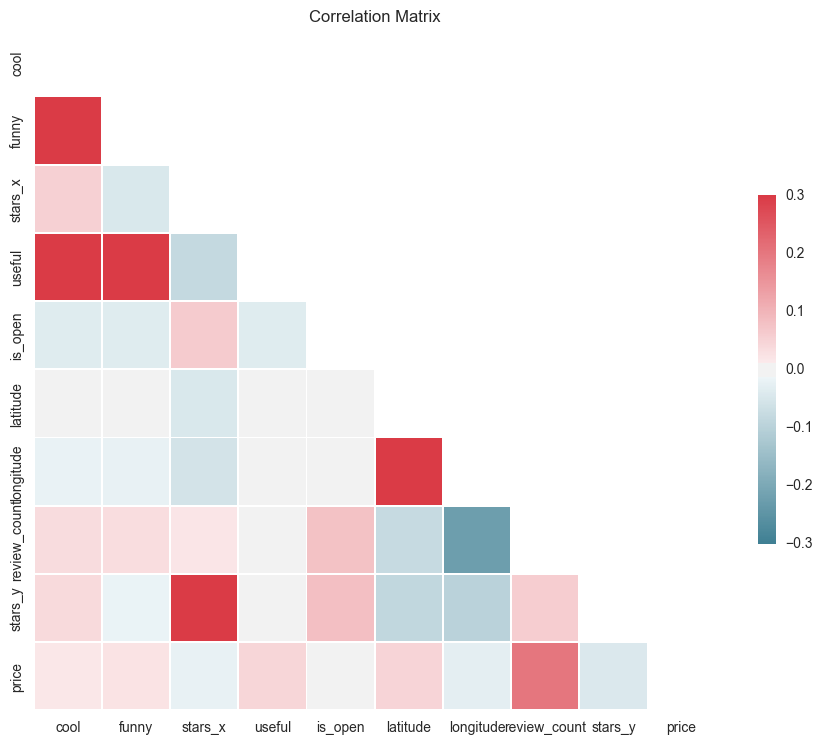

In [20]:
# Plot the correlation matrix
def corr_plot(df, title = 'Correlation Matrix', annot=False, show = True):
    sns.set(style = 'white')

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=annot,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(title)
    if show:
        plt.show()
corr_plot(d['RB'])

# NLTK !

In [21]:
documents = [(t, star) for t,star in zip(d['RB']['text'], d['RB']['stars_x'])]

In [22]:
print(documents[0])

("We recently decided to give this place another try after having issues at our normal vet and I'm very glad we did! We transferred all of our pets records over here and plan on using them and only them. The receptionists are always on top of everything, friendly and helpful. Both the vet techs as well as the vets have also been very friendly, helpful and knowledgeable. We had an incident with one of or dogs, Miracle, and Dr.Finder took GREAT care of her and now Miracle LOVES her. We are very pleased with the treatment our animals have been receiving here!", 5.0)


In [18]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

for w in example_words:
    print(ps.stem(w))

python
python
python
python
pythonli


In [19]:
import nltk

all_words = []

for (t, star) in documents:
    for word in t.split():
        w = word.lower().replace('.', '').replace(',', '').replace('!', '')
        all_words.append(ps.stem(w))
        
all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15))
print("stupid appeared: " + str(all_words['stupid']) + "times")

[('the', 25207), ('and', 17402), ('i', 13434), ('a', 12866), ('to', 12566), ('wa', 9003), ('of', 7497), ('it', 6576), ('for', 6096), ('is', 5996), ('in', 5677), ('my', 4878), ('that', 4374), ('with', 4131), ('we', 4044)]
stupid appeared: 26times


In [22]:
words_features = [s for (s,_) in list(all_words.most_common(3000))]

def find_features(document):
    words = set(document.split())
    features = {}
    for w in words:
        w = w.lower().replace('.', '').replace(',', '').replace('!', '')
        w = ps.stem(w)
        features[w] = (w in words_features)
    return features

featuresets = [(find_features(doc), star) for (doc,star) in documents]
print(featuresets[0])

({'receptionist': True, 'we': True, 'plan': True, 'one': True, 'veri': True, 'had': True, 'been': True, 'incid': True, 'care': True, 'here': True, 'all': True, 'top': True, 'dog': True, 'the': True, 'them': True, 'and': True, 'pleas': True, 'normal': True, 'with': True, 'over': True, 'or': True, 'have': True, 'thi': True, 'friendli': True, 'on': True, 'her': True, 'took': True, 'treatment': True, 'pet': True, 'recent': True, 'onli': True, 'after': True, 'anim': True, 'record': True, 'an': True, 'anoth': True, 'give': True, 'receiv': True, 'issu': True, 'our': True, 'tech': True, 'both': True, 'glad': True, 'also': True, 'to': True, 'great': True, 'decid': True, 'at': True, 'are': True, 'tri': True, 'knowledg': True, 'transfer': True, 'help': True, 'drfinder': False, 'alway': True, 'place': True, 'well': True, 'vet': True, 'did': True, 'now': True, 'as': True, 'of': True, 'everyth': True, "i'm": True, 'use': True, 'love': True, 'miracl': True}, 5.0)


In [23]:
len(featuresets)

4349

In [33]:
# POS to NEG encode
temp = []
pos_count = 0
for i in range(len(featuresets)):
    if featuresets[i][1] >= 4:
        temp.append((featuresets[i][0], 'pos'))
        pos_count = pos_count + 1
    else:
        temp.append((featuresets[i][0], 'neg'))
print("pos rate: ", pos_count / len(temp))
print("len of temp: ", len(temp))

pos rate:  0.6518739940216142
len of temp:  4349


In [34]:
training_set = temp[:3000]
testing_set = temp[3000:]

In [27]:
# only 1 and 5
temp = []
one_count = 0
for i in range(len(featuresets)):
    if featuresets[i][1] == 1:
        temp.append((featuresets[i][0], 1.0))
        one_count = one_count + 1
    elif featuresets[i][1] == 5:
        temp.append((featuresets[i][0], 5.0))
print("one rate: ", one_count / len(temp))
print("len of temp: ", len(temp))

one rate:  0.248868778280543
len of temp:  2431


In [28]:
train_set = temp[:1800]
test_set = temp[1800:]

In [30]:
clf = nltk.NaiveBayesClassifier.train(train_set)
print("Naive Bayes Classifier accuracy: ", nltk.classify.accuracy(clf, test_set) * 100)
clf.show_most_informative_features(50)

Naive Bayes Classifier accuracy:  46.90966719492869
Most Informative Features
                  refund = True              1.0 : 5.0    =     50.9 : 1.0
                 terribl = True              1.0 : 5.0    =     41.3 : 1.0
                    rude = True              1.0 : 5.0    =     36.4 : 1.0
                   worst = True              1.0 : 5.0    =     31.3 : 1.0
                   bland = True              1.0 : 5.0    =     29.0 : 1.0
                 horribl = True              1.0 : 5.0    =     26.3 : 1.0
                  period = True              1.0 : 5.0    =     23.0 : 1.0
                   ignor = True              1.0 : 5.0    =     21.0 : 1.0
                    poor = True              1.0 : 5.0    =     20.3 : 1.0
                    zero = True              1.0 : 5.0    =     19.8 : 1.0
                    dirt = True              1.0 : 5.0    =     19.0 : 1.0
                   tough = True              1.0 : 5.0    =     19.0 : 1.0
                  apol

## Combing multiple classifiers

In [39]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC


Naive_Bayes_clf = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(Naive_Bayes_clf, testing_set))*100)
Naive_Bayes_clf.show_most_informative_features(15)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MultinomialNB accuracy percent:",nltk.classify.accuracy(MNB_classifier, testing_set))

BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)
print("BernoulliNB accuracy percent:",nltk.classify.accuracy(BNB_classifier, testing_set))

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)

Original Naive Bayes Algo accuracy percent: 46.404744255003706
Most Informative Features
                  refund = True              neg : pos    =     29.7 : 1.0
                    zero = True              neg : pos    =     24.8 : 1.0
                   ignor = True              neg : pos    =     21.2 : 1.0
                    rude = True              neg : pos    =     19.6 : 1.0
                   bewar = True              neg : pos    =     17.6 : 1.0
               tasteless = True              neg : pos    =     16.3 : 1.0
                   appar = True              neg : pos    =     14.3 : 1.0
                 terribl = True              neg : pos    =     14.0 : 1.0
                 payment = True              neg : pos    =     12.7 : 1.0
                    dirt = True              neg : pos    =     12.7 : 1.0
                  garbag = True              neg : pos    =     12.7 : 1.0
              seriously? = True              neg : pos    =     11.5 : 1.0
           

### Combine multiple classifiers

In [45]:
from nltk.classify import ClassifierI
from statistics import mode

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        chosen_class = votes.count(mode(votes))
        return chosen_class / len(votes)
    
voted_classifier = VoteClassifier(SVC_classifier,
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  SGDClassifier_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)
print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)


voted_classifier accuracy percent: 84.28465530022238


# Playing with TextBlob

In [23]:
from textblob import TextBlob

group = pd.DataFrame(documents)
group.rename(columns = {0:'review_text', 1:'star'}, inplace = True)
group['polarity'] = [TextBlob(s).sentiment.polarity for s in group['review_text']]
group['subjectivity'] = [TextBlob(s).sentiment.subjectivity for s in group['review_text']]
group['word_list'] = [TextBlob(s).words.lemmatize() for s in group['review_text']]
print(list(group))
group.head()

['review_text', 'star', 'polarity', 'subjectivity', 'word_list']


,review_text,star,polarity,subjectivity,word_list
0,We recently decided to give this place another...,5.0,0.437500,0.700000,"[We, recently, decided, to, give, this, place,..."
1,"Honestly, very rarely do I leave a negative fe...",1.0,0.043036,0.563849,"[Honestly, very, rarely, do, I, leave, a, nega..."
2,"Good food. Place seems a little hidden, but I ...",4.0,0.283854,0.566667,"[Good, food, Place, seems, a, little, hidden, ..."
3,Great wine and beer selections along with grea...,5.0,0.493750,0.720833,"[Great, wine, and, beer, selection, along, wit..."
4,Went there with my family for a casual quick d...,4.0,0.202360,0.700978,"[Went, there, with, my, family, for, a, casual..."


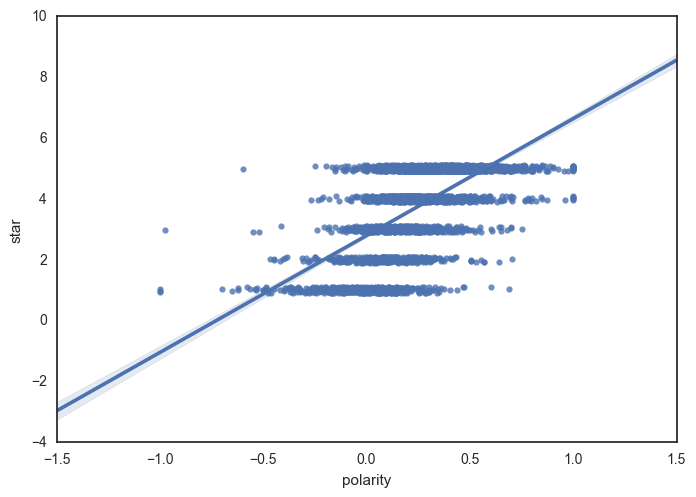

In [24]:
sns.regplot(x="polarity", y="star", data=group, y_jitter=.1)

plt.show()

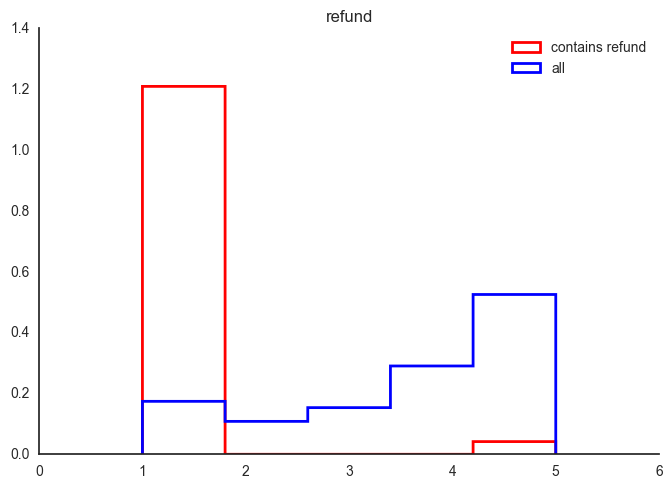

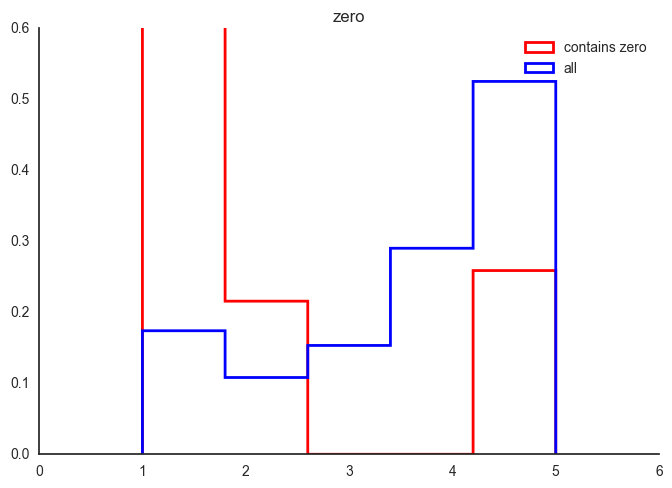

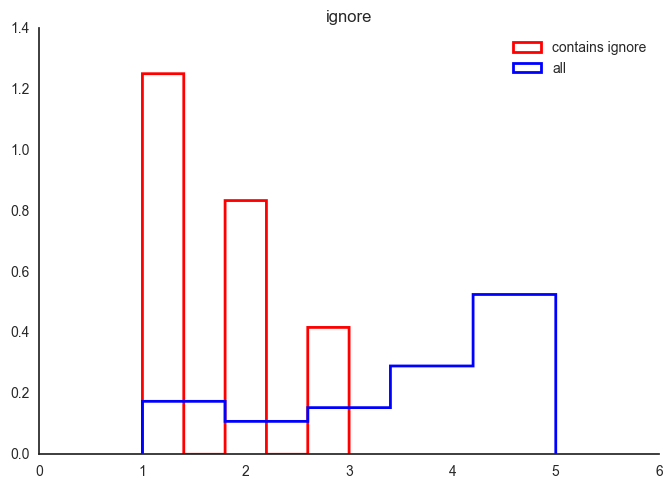

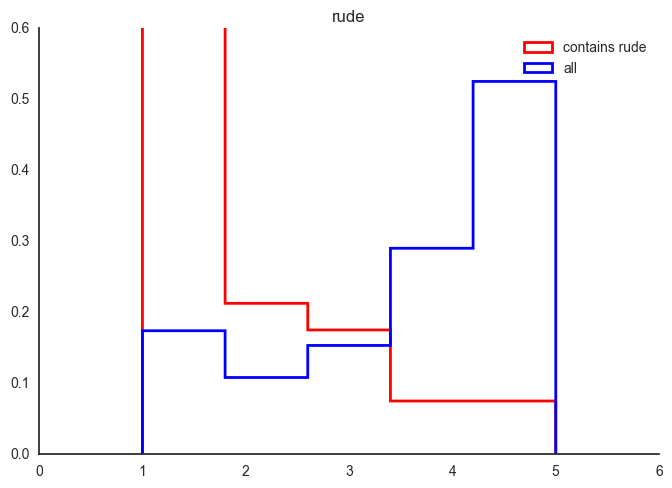

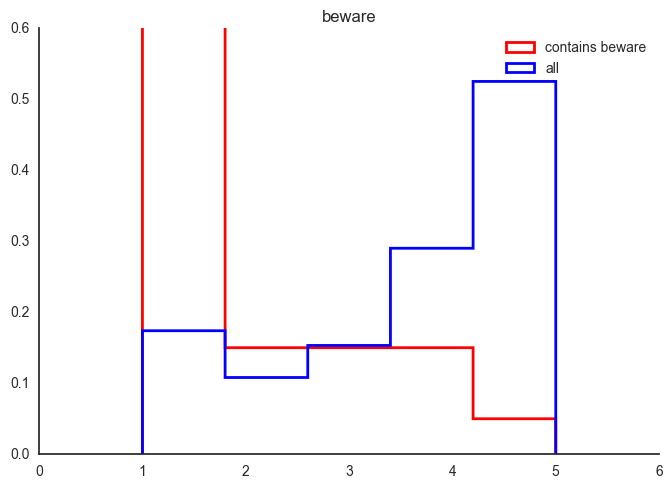

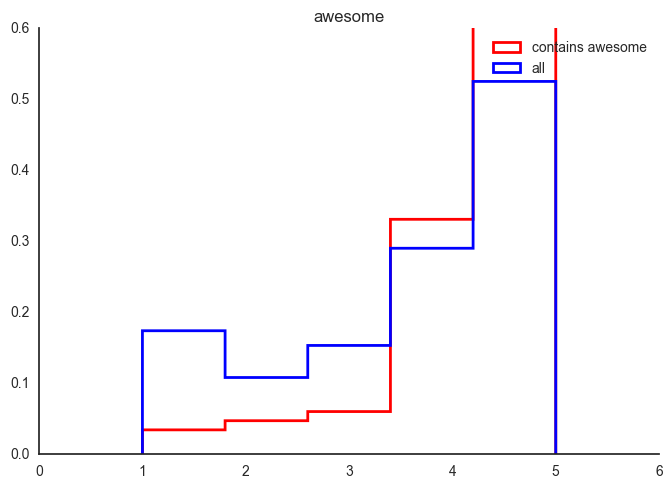

/Users/zihaoxu/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:5991: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


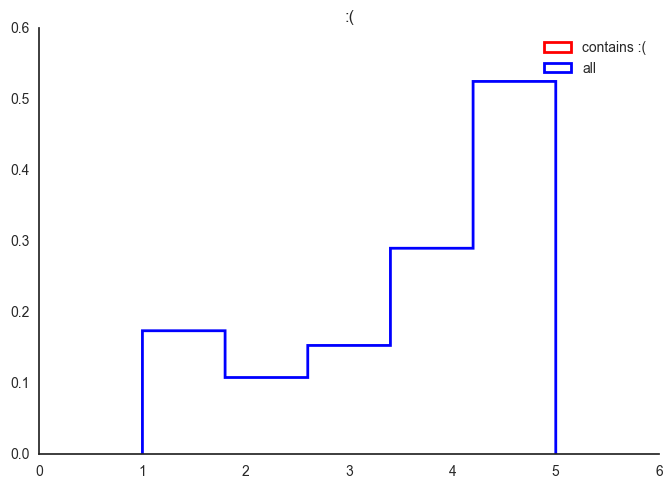

In [35]:
# interesing_list = ['great', 'place', 'food', 'love', 'service', 'always', 'never', 'best', 'pretty', 'back', 'time']
interesing_list = ['refund', 'zero', 'ignore', 'rude', 'beware','awesome', ':(']
sns.set(style = 'white')
for i in interesing_list:
    temp = group
    temp['indicate'] = [w.count(i) > 0 for w in group['word_list']]
    included = temp[temp['indicate'] == True]
    plt.figure()
    plt.hist(included['star'], color = 'r', normed = True, histtype='step', bins = 5, label = 'contains '+i, lw = 2)
    plt.hist(group['star'], color = 'b', normed = True, histtype='step', bins = 5, label = 'all', lw = 2)
    plt.legend()
    plt.title(i)
    plt.xlim(0,6)
    sns.despine()
    plt.show()

# Usefulness, Cool & Funny

In [6]:
d['R'].head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,fjMXGgOr3aCxnN48kovZ_Q,0,2015-03-09,0.0,3BBCHVND9tDPNliTFoLCHA,5.0,We recently decided to give this place another...,0.0,bCrpStRCku_gEX3Iwuv94A
1,6tTv835MSguUBDpDtVRvMA,0,2015-02-08,0.0,C5hIHvQ00OuvuTrrKEAp5Q,5.0,"Great food, so flavorful, love the authentici...",0.0,WBo0ypbBy0hLfubEjnNHlg
2,X5rhVY-kSp9-EomdixZYmA,2,2013-12-12,2.0,20nQWluLCI4jsD5VhKelqQ,5.0,""" La nouvelle maison-bibliothèque de Sol est t...",3.0,gpN4Z9leh5VScpeI3pqE4g
3,4dG1QdAF9sE7c00Q-VVkMg,0,2017-03-05,0.0,9rGfGE9qh3imgo9loAR4jQ,1.0,"Honestly, very rarely do I leave a negative fe...",1.0,nEhDik3rrQFZO4kRC_3aJw
4,JCZEK7wiazoM6xiq8YeZyw,0,2010-03-04,0.0,S7LP0sBrA36wDICecodzlQ,4.0,"Good food. Place seems a little hidden, but I ...",1.0,g_GhhHtMofLnlokoScupBQ


/Users/zihaoxu/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


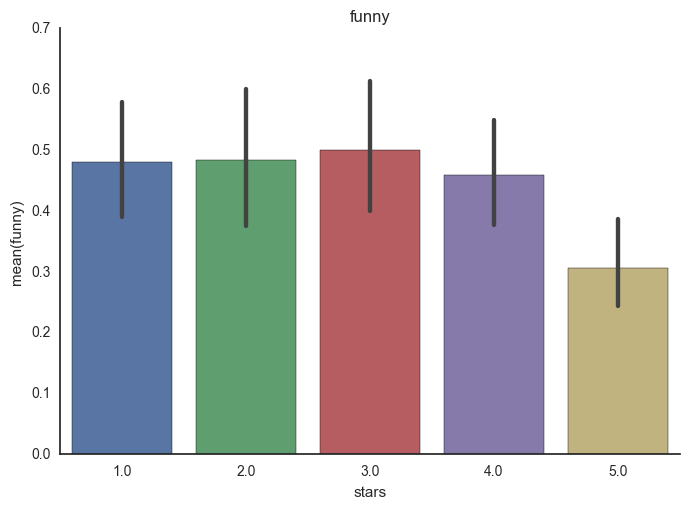

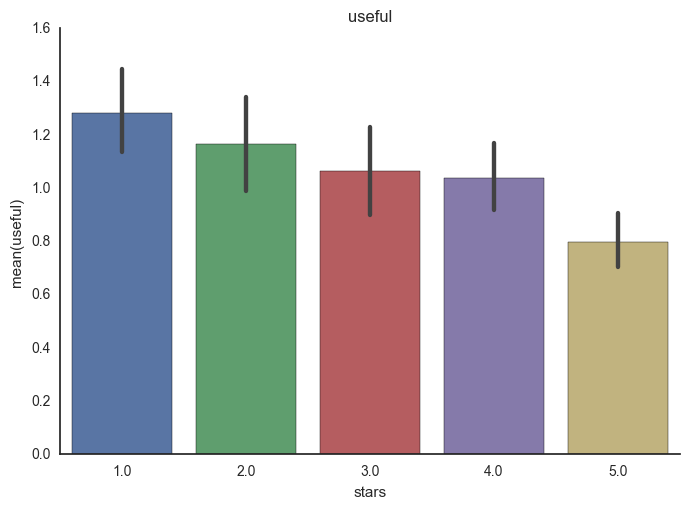

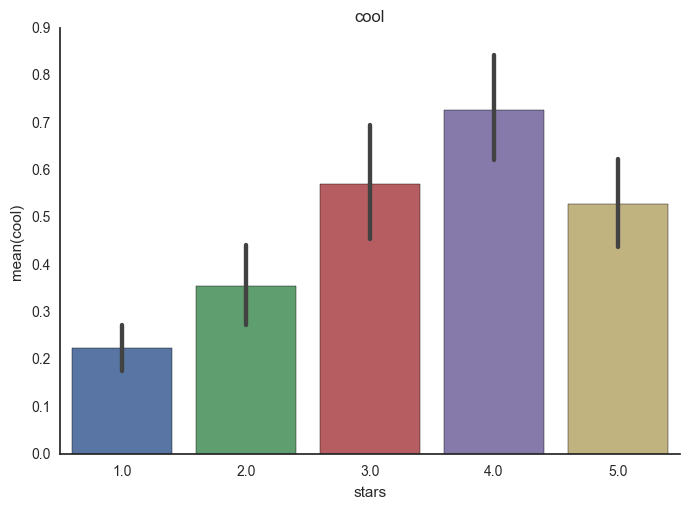

In [41]:
for col in ['funny', 'useful', 'cool']:
    sns.barplot(data = d['R'], y = col, x = 'stars')
    sns.despine()
    plt.title(col)
    plt.show()

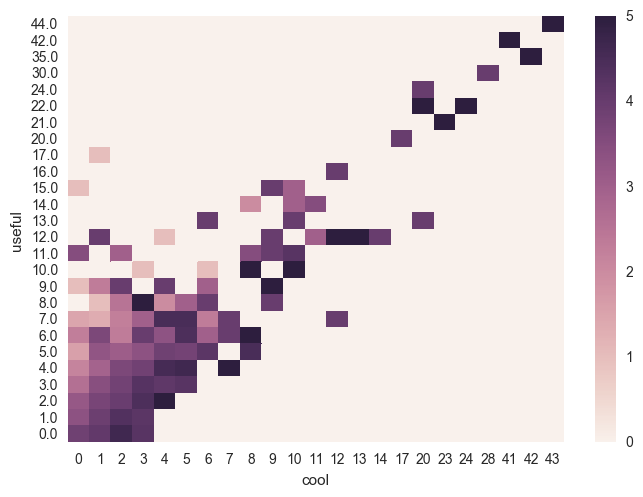

In [51]:
heat = d['R'].pivot_table("stars", "useful", "cool").fillna(0)
ax = sns.heatmap(heat)
ax.invert_yaxis()
plt.show()

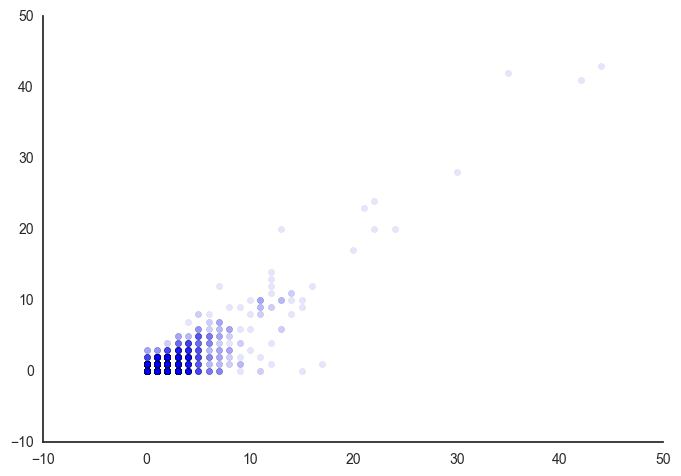

In [57]:
plt.scatter(d['R']['useful'], d['R']['cool'], alpha = 0.1)
show()

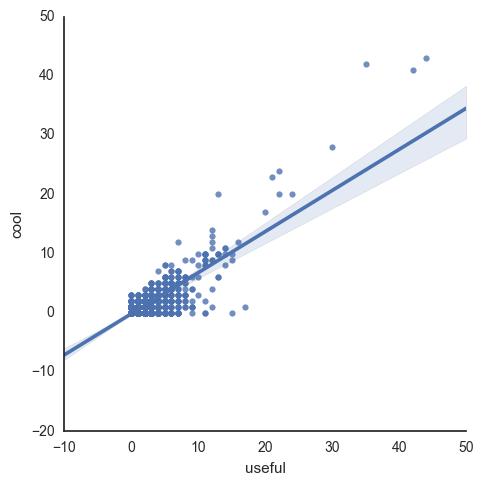

In [60]:
sns.lmplot(x="useful", y="cool", data=d['R'])
show()